In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn import model_selection ,metrics
from xgboost.sklearn import XGBClassifier

In [63]:
df0=pd.read_csv('train.csv')
dfx=pd.read_csv('test.csv')
df=pd.concat([df0,dfx])
print(len(df0))
df.head()

54808


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [64]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [65]:
df['department'].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [66]:
len(df['region'].value_counts())

34

In [67]:
df['education'].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [68]:
df['education']=df['education'].apply(lambda x: 2 if x=="Bachelor's" or x=='NaN' else x)
df['education']=df['education'].apply(lambda x: 3 if x=="Master's & above" else 1)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,3,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,1,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,1,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,1,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,1,m,other,1,45,3.0,2,0,0,73,0.0


In [69]:
df['gender']=df['gender'].apply(lambda x: 0 if x=="f" or x=='NaN' else 1) 

In [80]:
df1=df
le=LabelEncoder()
df1['recruitment_channel']=le.fit_transform(df1['recruitment_channel'])
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,3,0,2,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,1,1,0,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,1,1,2,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,1,1,0,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,1,1,0,1,45,3.0,2,0,0,73,0.0


In [81]:
x=pd.get_dummies(df['department'])
x=x.drop(['R&D'],axis=1)
df2=pd.concat([x,df1],axis=1)
df2=df2.drop(['department'],axis=1)
df2.head()


,Analytics,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,employee_id,region,...,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,0,0,1,0,65438,region_7,...,0,2,1,35,5.0,8,1,0,49,0.0
1,0,0,0,0,1,0,0,0,65141,region_22,...,1,0,1,30,5.0,4,0,0,60,0.0
2,0,0,0,0,0,0,1,0,7513,region_19,...,1,2,1,34,3.0,7,0,0,50,0.0
3,0,0,0,0,0,0,1,0,2542,region_23,...,1,0,2,39,1.0,10,0,0,50,0.0
4,0,0,0,0,0,0,0,1,48945,region_26,...,1,0,1,45,3.0,2,0,0,73,0.0


In [82]:
le=LabelEncoder()
df2['region']=le.fit_transform(df2['region'])
df2.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,employee_id,region,...,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,0,0,1,0,65438,31,...,0,2,1,35,5.0,8,1,0,49,0.0
1,0,0,0,0,1,0,0,0,65141,14,...,1,0,1,30,5.0,4,0,0,60,0.0
2,0,0,0,0,0,0,1,0,7513,10,...,1,2,1,34,3.0,7,0,0,50,0.0
3,0,0,0,0,0,0,1,0,2542,15,...,1,0,2,39,1.0,10,0,0,50,0.0
4,0,0,0,0,0,0,0,1,48945,18,...,1,0,1,45,3.0,2,0,0,73,0.0


In [83]:
df2['previous_year_rating']=df2['previous_year_rating'].fillna(df2['previous_year_rating'].mean())

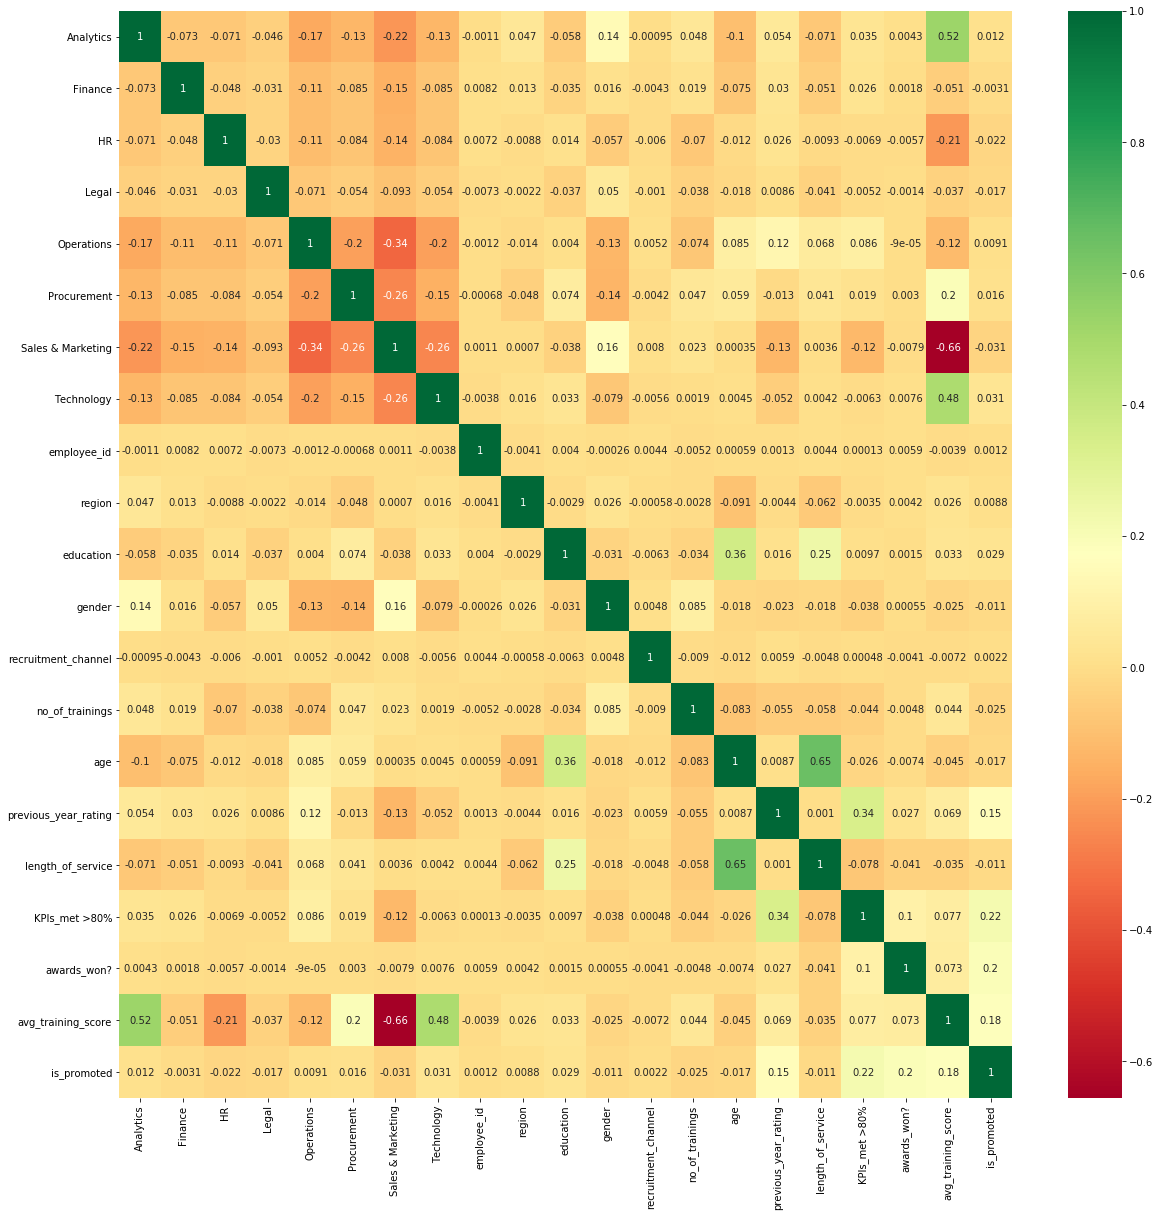

In [84]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [85]:
X1=df2.drop(['is_promoted','employee_id','region','recruitment_channel'],axis=1)
y1=df2['is_promoted']
X1.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,Sales & Marketing,Technology,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,0,0,0,0,0,1,0,3,0,1,35,5.0,8,1,0,49
1,0,0,0,0,1,0,0,0,1,1,1,30,5.0,4,0,0,60
2,0,0,0,0,0,0,1,0,1,1,1,34,3.0,7,0,0,50
3,0,0,0,0,0,0,1,0,1,1,2,39,1.0,10,0,0,50
4,0,0,0,0,0,0,0,1,1,1,1,45,3.0,2,0,0,73


In [86]:
scaler=StandardScaler()
X1['avg_training_score']=scaler.fit_transform(X1[['avg_training_score']])
X1['age']=scaler.fit_transform(X1[['age']])
#X1['region']=scaler.fit_transform(X1[['region']])

In [232]:
from sklearn.preprocessing import PolynomialFeatures

In [233]:
poly = PolynomialFeatures(interaction_only=True,degree=2)
X1=poly.fit_transform(X1)
X1 = pd.DataFrame(X1)
X1.head()

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,...,40.0,5.0,0.0,-5.360922,8.0,0.0,-8.577475,0.0,-1.072184,-0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,20.0,0.0,0.0,-1.251408,0.0,0.0,-1.001127,0.0,-0.000000,-0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,21.0,0.0,0.0,-2.992398,0.0,0.0,-6.982262,0.0,-0.000000,-0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,10.0,0.0,0.0,-0.997466,0.0,0.0,-9.974660,0.0,-0.000000,-0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,6.0,0.0,0.0,2.163174,0.0,0.0,1.442116,0.0,0.000000,0.0


In [234]:
scaler=StandardScaler()
for i in range(1,154):
    X1[i]=scaler.fit_transform(X1[[i]])
X1.head()

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,1.0,-0.329565,-0.220393,-0.216413,-0.138994,-0.509012,-0.386103,1.497158,-0.385906,1.629059,...,1.221287,1.841815,-0.145559,-1.535202,1.774116,-0.129119,-1.218727,-0.124916,-1.863672,-0.05621
1,1.0,-0.329565,-0.220393,-0.216413,-0.138994,1.964588,-0.386103,-0.667932,-0.385906,-0.613851,...,0.030064,-0.698834,-0.145559,-0.376393,-0.557396,-0.129119,-0.123105,-0.124916,-0.061670,-0.05621
2,1.0,-0.329565,-0.220393,-0.216413,-0.138994,-0.509012,-0.386103,1.497158,-0.385906,-0.613851,...,0.089625,-0.698834,-0.145559,-0.867321,-0.557396,-0.129119,-0.988042,-0.124916,-0.061670,-0.05621
3,1.0,-0.329565,-0.220393,-0.216413,-0.138994,-0.509012,-0.386103,1.497158,-0.385906,-0.613851,...,-0.565547,-0.698834,-0.145559,-0.304786,-0.557396,-0.129119,-1.420774,-0.124916,-0.061670,-0.05621
4,1.0,-0.329565,-0.220393,-0.216413,-0.138994,-0.509012,-0.386103,-0.667932,2.591303,-0.613851,...,-0.803792,-0.698834,-0.145559,0.586458,-0.557396,-0.129119,0.230214,-0.124916,-0.061670,-0.05621


In [75]:
y=y1[:54808]
X=X1[:54808]
X2=X1[54808:]

In [76]:
xtr,xte,ytr,yte=tts(X,y,test_size=0.99)

In [52]:
model_params={
    'svm':{
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'RFC':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,40,100,150]
        }
    },
    'logreg':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C': [1,5,10]
        } 
    }
}

In [62]:
alg2 = RandomForestClassifier(n_estimators=120)
model_selection.cross_val_score(alg2,xtr,ytr,cv=20).mean()

0.9255291005291006

In [61]:
alg3 = GradientBoostingClassifier()
model_selection.cross_val_score(alg3,xtr,ytr,cv=20).mean()

0.9327380952380955

In [59]:
alg0 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=5,
 min_child_weight=2,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
model_selection.cross_val_score(alg0,xtr,ytr,cv=20).mean()

0.9218253968253967

In [229]:
alg4 = DecisionTreeClassifier(max_depth=15, min_samples_leaf=20,min_samples_split=15)
model_selection.cross_val_score(alg4,X,y,cv=20).mean()

0.9385126905040249

In [60]:
alg5 = SVC(C=1,kernel='rbf')
model_selection.cross_val_score(alg5,xtr,ytr,cv=20).mean()

0.9180555555555557

In [79]:
alg1=CatBoostClassifier(iterations=20,
                          learning_rate=0.8,
                          depth=6,verbose=False)
model_selection.cross_val_score(alg1,X,y,cv=20).mean()

0.9415231933574247

In [280]:
alg4.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [281]:
alg3.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [282]:
alg2.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [220]:
alg1.fit(X,y)

0:	learn: 0.2369311	total: 17ms	remaining: 323ms
1:	learn: 0.2000740	total: 27.9ms	remaining: 251ms
2:	learn: 0.1903453	total: 40ms	remaining: 227ms
3:	learn: 0.1718030	total: 52.4ms	remaining: 210ms
4:	learn: 0.1686550	total: 64.2ms	remaining: 193ms
5:	learn: 0.1672224	total: 75.7ms	remaining: 177ms
6:	learn: 0.1646385	total: 88ms	remaining: 163ms
7:	learn: 0.1643015	total: 98.8ms	remaining: 148ms
8:	learn: 0.1640303	total: 110ms	remaining: 134ms
9:	learn: 0.1631953	total: 123ms	remaining: 123ms
10:	learn: 0.1627525	total: 136ms	remaining: 111ms
11:	learn: 0.1623045	total: 147ms	remaining: 98ms
12:	learn: 0.1612914	total: 159ms	remaining: 85.5ms
13:	learn: 0.1604720	total: 172ms	remaining: 73.6ms
14:	learn: 0.1600338	total: 184ms	remaining: 61.3ms
15:	learn: 0.1591319	total: 197ms	remaining: 49.1ms
16:	learn: 0.1586065	total: 209ms	remaining: 36.8ms
17:	learn: 0.1580586	total: 229ms	remaining: 25.5ms
18:	learn: 0.1571738	total: 249ms	remaining: 13.1ms
19:	learn: 0.1567329	total: 261ms

In [221]:
#ans4=alg4.predict(X1[54808:])
#ans2=alg2.predict(X1[54808:])
#ans3=alg3.predict(X1[54808:])
ans1=alg1.predict(X2)
ans=ans1

In [222]:
ans=ans.astype(int)
ans

array([0, 0, 0, ..., 0, 0, 1])

In [223]:
xx=pd.read_csv('submission.csv')
xx.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [224]:
xx=xx.drop(['is_promoted'],axis=1)
xx['is_promoted']=ans
xx.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [225]:
xx.to_csv('submission.csv',index=False)

In [226]:
len(xx)

23490

In [227]:
xx['is_promoted'].value_counts()

0    22727
1      763
Name: is_promoted, dtype: int64